# Importing the libaries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

# Loading the dataset

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive/")

In [0]:
df = pd.read_csv("./poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


In [0]:
df = df.drop("Unnamed: 0", axis=1)

In [0]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the model for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Fitting SVR to the dataset for predicting the heating load
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
regressor.predict(X_test)

array([13.99713027, 11.81376315, 31.29187898, 26.34147917, 29.33229196,
       30.06099497, 30.64831581, 30.90647539, 30.6268579 , 30.72985703,
       11.88213354, 30.16769099, 13.25693766, 32.05455461, 31.31835997,
       30.76628128, 12.7255656 , 28.41075402, 14.78615487, 12.59617865,
       13.13947726, 31.07751097, 12.62383613, 31.01263048, 11.5867505 ,
       13.01312517, 14.42693719, 13.05685563, 12.36424198, 30.40921205,
       14.04138283, 13.6205542 , 32.13565456, 13.47101788, 31.48790536,
       33.15581519, 13.00458143, 31.65555297, 14.59574627, 12.81058358,
       13.17619669, 31.62366721, 13.46229974, 31.12589767, 25.62780422,
       31.1045    , 12.86380985, 13.51517019, 31.33368339, 30.71424244,
       31.01526816, 13.9453058 , 32.33916924, 14.15247566, 32.87970261,
       12.01760881, 26.03655491, 28.71746267, 31.33407863, 13.58030545,
       14.03475095, 12.9000894 , 31.78394718, 12.09056988, 12.35099267,
       12.61349037, 30.84727609, 13.12061029, 29.66913186, 31.60

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_f = pd.DataFrame()

In [0]:
df_f['original_values'] = y_test.flatten()
df_f['Predicted_Values'] = regressor.predict(X_test)

In [0]:
df_f

,original_values,Predicted_Values
0,15.18,13.997130
1,10.32,11.813763
2,37.26,31.291879
3,16.95,26.341479
4,32.26,29.332292
...,...,...
149,14.33,14.666063
150,28.15,30.043863
151,11.33,13.238991
152,13.86,14.710809


In [0]:
 from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse = mean_squared_error(df_f['original_values'], df_f['Predicted_Values'])
mse

18.447427789301297

In [0]:
# Calculamos el Mean Absolute Error
mae = mean_absolute_error(df_f['original_values'], df_f['Predicted_Values'])
mae

3.17414098776663

In [0]:
# Calculamos el Root Mean Squared Error 
from math import sqrt
root_mean_squared_error = sqrt(mse)
root_mean_squared_error

4.295046890233132

Text(0, 0.5, 'Heating Load')

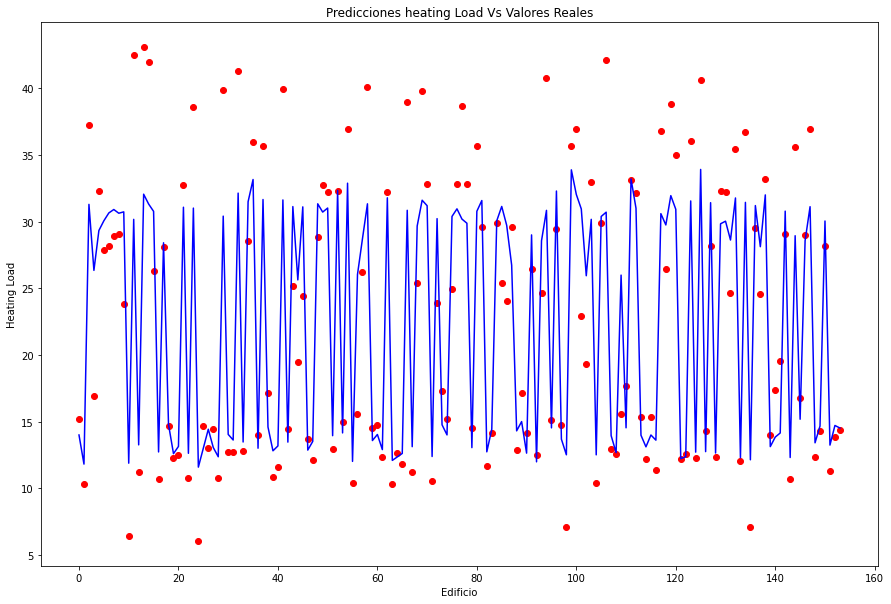

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), regressor.predict(X_test), color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

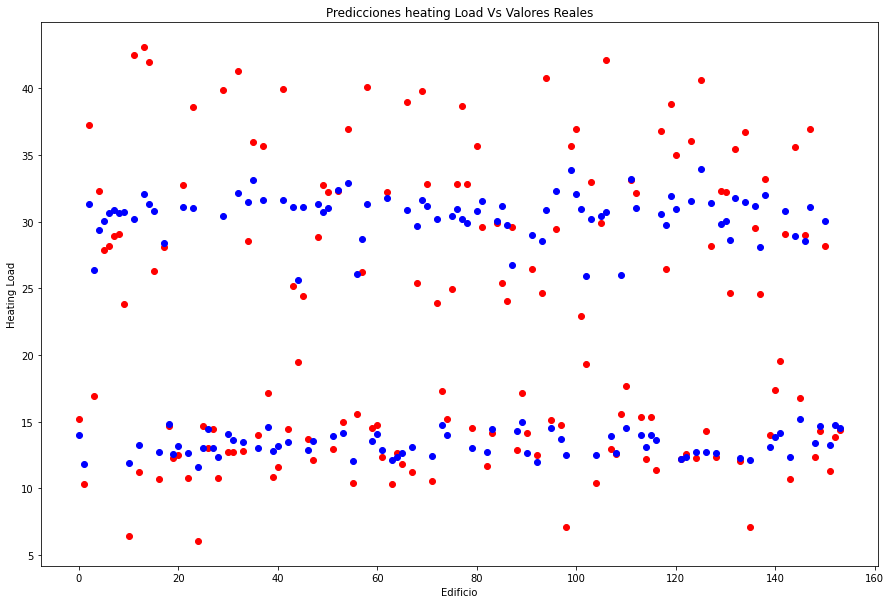

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), regressor.predict(X_test), color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the model for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
from sklearn.model_selection import train_test_split
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Fitting SVR to the dataset for predicting the cooling load
regressor_cooling = SVR(kernel = 'rbf')
regressor_cooling.fit(X_cooling, y_cooling)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
regressor_cooling.predict(X_test_cooling)

array([16.15375462, 14.72071977, 32.81354114, 28.94957383, 31.17770639,
       32.23696416, 32.4631071 , 32.30150504, 32.74745055, 31.95624098,
       15.40013821, 32.09497418, 15.60142894, 33.43209463, 32.72544313,
       32.62897202, 15.38824423, 30.8450061 , 16.81908449, 15.28234813,
       15.49453631, 32.58227898, 15.16698078, 32.41232244, 15.19613873,
       15.6285103 , 16.52265307, 15.45951468, 15.48502988, 31.60573184,
       16.05846645, 15.87472119, 33.22638138, 15.92282328, 32.89821518,
       34.11550249, 15.53246652, 32.66646246, 17.13417756, 16.04424251,
       15.4727118 , 33.2976474 , 16.33955312, 33.15994944, 28.0945823 ,
       32.58611704, 15.55969401, 15.97655407, 33.10597648, 32.88132864,
       32.75978698, 16.21558339, 34.21084157, 16.23195553, 33.77639545,
       15.24964945, 28.50323483, 31.09830962, 33.38990384, 15.85837305,
       16.21895664, 15.60148695, 33.4211033 , 14.81437752, 15.35072565,
       15.20617479, 32.88306698, 15.41516962, 31.75279797, 33.55

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_c = pd.DataFrame()

In [0]:
df_c['original_values'] = y_test_cooling.flatten()
df_c['Predicted_Values'] = regressor_cooling.predict(X_test_cooling)

In [0]:
df_c

,original_values,Predicted_Values
0,17.63,16.153755
1,13.57,14.720720
2,34.62,32.813541
3,21.16,28.949574
4,33.34,31.177706
...,...,...
149,15.41,16.575506
150,30.00,32.067515
151,15.00,15.513046
152,14.75,16.853680


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_c['original_values'], df_c['Predicted_Values'])
mse_cooling

15.126375957092732

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_c['original_values'], df_c['Predicted_Values'])
mae_cooling

2.7622084624948697

In [0]:
from math import sqrt
# Calculamos el Root Mean Squared Error 
root_mean_squared_error_cooling = sqrt(mse_cooling)
root_mean_squared_error_cooling

3.889264192246746

Text(0, 0.5, 'Cooling Load')

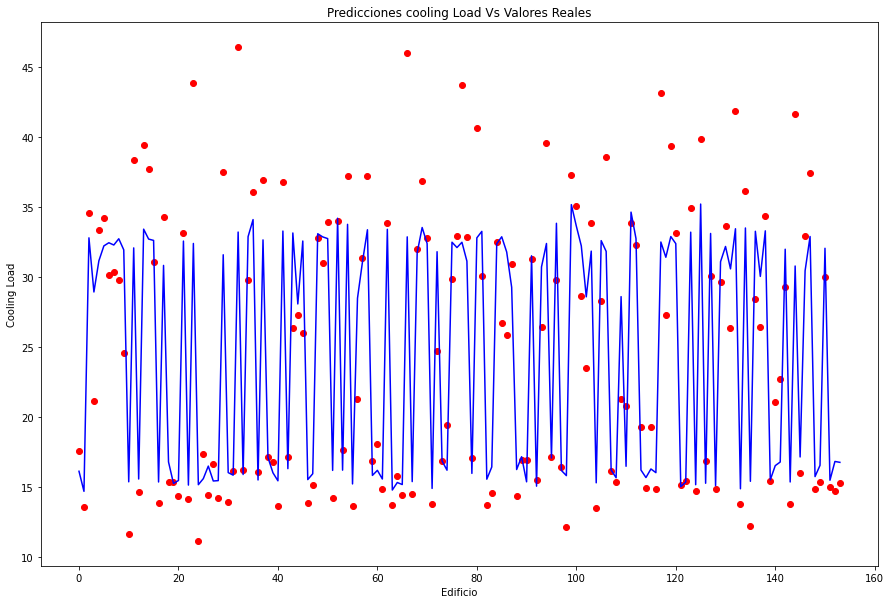

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), regressor_cooling.predict(X_test_cooling), color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

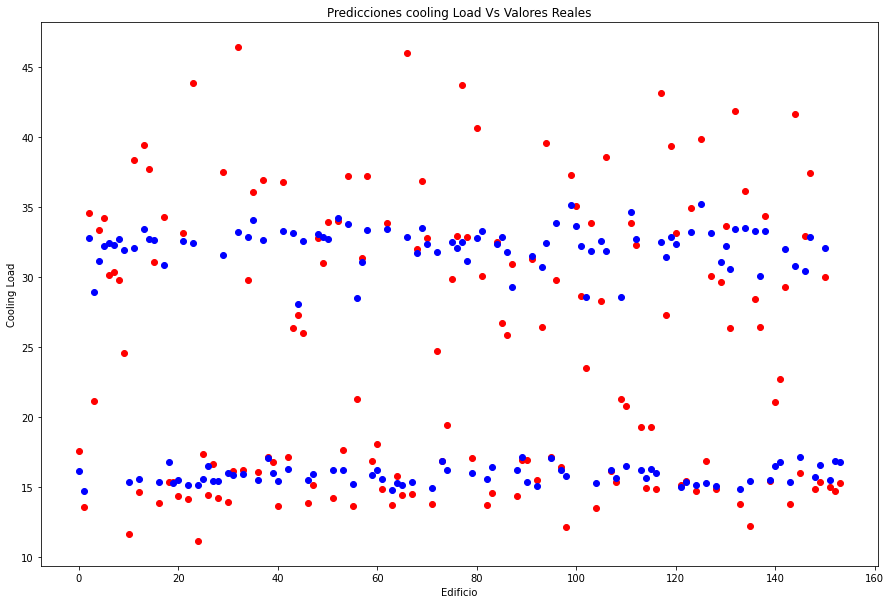

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), regressor_cooling.predict(X_test_cooling), color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')